In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from IPython.display import display, HTML

import numpy as np 
import pandas as pd
import cv2
import math

import os
from pathlib import Path

import time
from datetime import datetime

from histogram import *
from imagereader import *
#from data_explorer import *


In [36]:
import matplotlib.pyplot as plt 
def plotHistCdf(title, bins, hist, cdf):
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi=100 )
    ax.set_title(title)
    l1 = ax.plot(bins, hist, label="hist", color='tab:blue' )
    
    ax2 = ax.twinx()
    l2 = ax2.plot(bins, cdf,  label="cdf", color='tab:orange' )

    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
    lns = l1+l2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper left')
    
    
    ax.set_xlabel("pixel value")
    ax.set_ylabel(r"distribution")
    ax2.set_ylabel(r"CDF")
    #ax2.set_ylim(0, 35)
    #ax.set_ylim(-20,100)
    fig.tight_layout() 


# Gaussian distribution
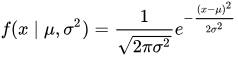

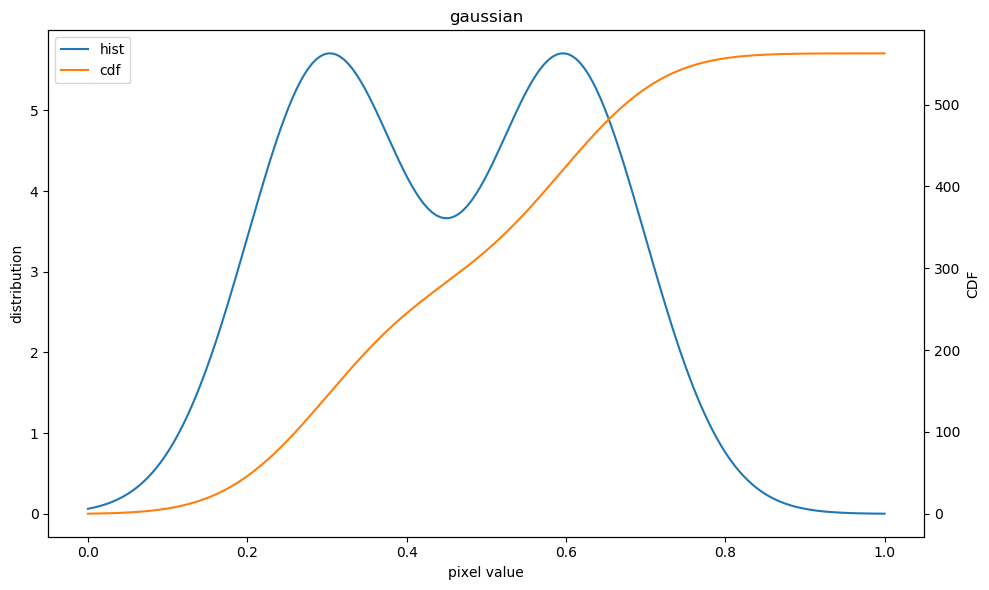

In [50]:
def gaussian(x, m, s):
    return np.exp( (-np.power(x - m, 2.) / (2 * np.power(s, 2.)) ) ) / np.sqrt(np.pi*s*s)

nb = 200
m = .3
s = .1
b = np.linspace(0,1,nb)
f = gaussian(b,m=.3,s=s) +   gaussian(b,m=.6,s=s)

plotHistCdf("gaussian", b, f, np.cumsum(f))

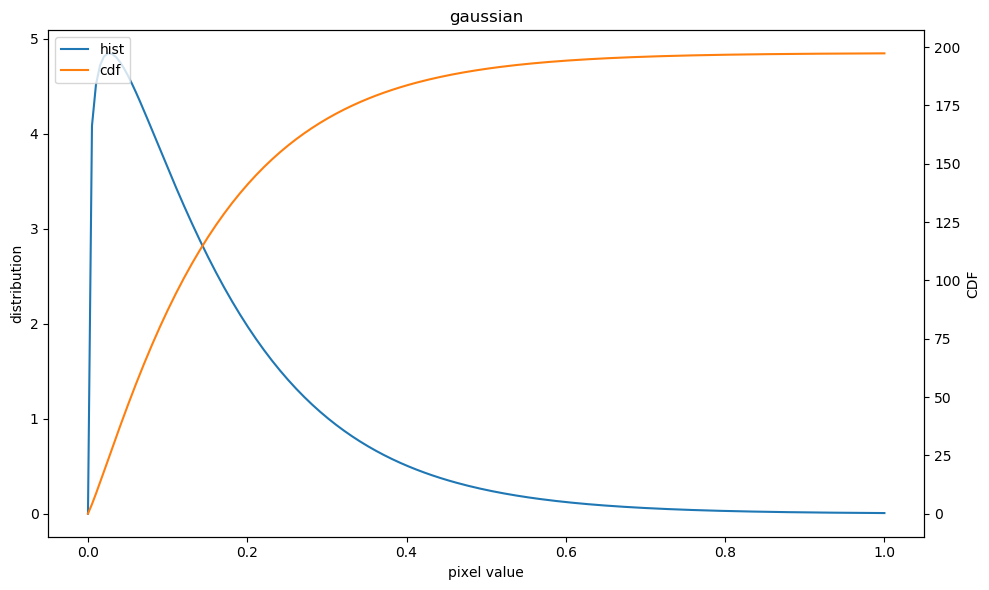

In [58]:
import scipy.stats as stats 
b = np.linspace(0,1,nb)
f = stats.gamma.pdf(b, a=1.2, scale=0.13333) #a is alpha, loc is beta???
plotHistCdf("gaussian", b, f, np.cumsum(f))

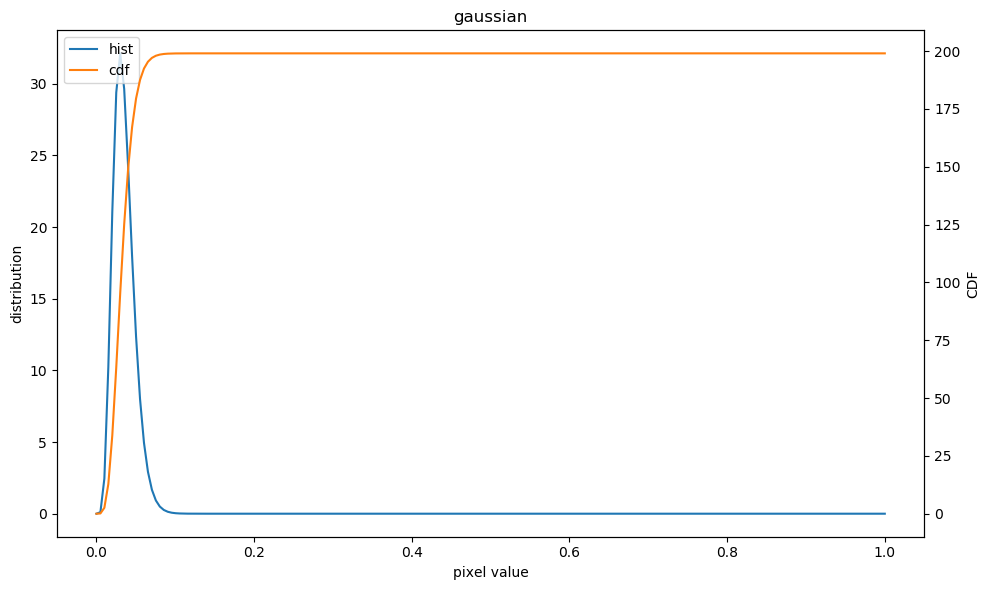

In [70]:
import scipy.stats as stats 
b = np.linspace(0,1,nb)
f = stats.gamma.pdf(b, a=7, scale=0.005) #a is alpha, loc is beta???
plotHistCdf("gaussian", b, f, np.cumsum(f))

In [ ]:
        vmin      = 0.
        vmax      = 1.
        nBins     = 64
        self.bins = np.linspace(vmin,vmax,nBins)
        self.cHist = Histogram(np.zeros()+1, vmin, vmax, middelBins=self.bins )
        self.dH = p.read_csv(PATH/"histograms.csv")
        
    def set_state(self): 
        super().set_state()
        self.store.do_tfm = random.random() < self.p
    def do_transform(self, x, is_y): 
        if self.store.do_tfm : 
            super().do_transform(x, is_y)
            
            #get a random histogram from the population
            rH = Histogram(self.dH.iloc[np.numpy.random.random_integers(0,self.dH.shape[0])], self.vmin, 
                           self.vmax, middelBins=self.bins )
            x = rH.equalize_t(rH)
                                        
            x = x+random.uniform(-self.d,self.d)
#            x = x+random.uniform(-self.d,self.d)
        return x